## 케글에서 데이터 가져오기!

https://chan-lab.tistory.com/17

In [1]:
# Kaggle API 설치
! pip install -q kaggle

In [1]:
!pwd

/home/ubuntu/jonghee


In [8]:
# 캐글 디렉토리 생성
! mkdir dataset

In [2]:
# 하위 디렉토리 확인
# !ls
!ls -d */

dataset/


In [19]:
!kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              235KB  2021-10-21 20:52:33          14618       1168  1.0              
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           8748        648  0.9375           
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           3909        277  1.0              
dhruvildave/wikibooks-dataset                               Wikibooks Dataset             

In [3]:
%cd dataset

/home/ubuntu/jonghee/dataset


In [24]:
!kaggle competitions download -c ventilator-pressure-prediction

 96%|██████████████████████████████████████▍ | 214M/223M [00:06<00:00, 39.1MB/s]
100%|████████████████████████████████████████| 223M/223M [00:06<00:00, 35.1MB/s]


In [25]:
!ls

ventilator-pressure-prediction.zip


In [26]:
!unzip ventilator-pressure-prediction.zip

Archive:  ventilator-pressure-prediction.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


## 여기서 부터 분석

In [32]:
!pip install matplotlib

Looking in indexes: http://ftp.daumkakao.com/pypi/simple
     |████████████████████████████████| 10.3 MB 23.8 MB/s eta 0:00:01
     |████████████████████████████████| 1.1 MB 103.9 MB/s eta 0:00:01
     |████████████████████████████████| 3.1 MB 38.6 MB/s eta 0:00:01


In [34]:
!pip install seaborn

Looking in indexes: http://ftp.daumkakao.com/pypi/simple
     |████████████████████████████████| 292 kB 15.1 MB/s eta 0:00:01
     |████████████████████████████████| 28.5 MB 46.6 MB/s eta 0:00:01


In [37]:
!pip install sklearn

Looking in indexes: http://ftp.daumkakao.com/pypi/simple
     |████████████████████████████████| 23.2 MB 25.1 MB/s eta 0:00:01     |███████████████████████████████ | 22.5 MB 25.1 MB/s eta 0:00:01
     |████████████████████████████████| 306 kB 87.9 MB/s eta 0:00:01
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1309 sha256=87e2d96a9dc8f48e2857e9961f1467006dbccfc43d44e820fc3d718315af0a3b
  Stored in directory: /home/ubuntu/.cache/pip/wheels/79/96/6d/02a440e733431bf50cfc6b83f48be0f338c29bd540ab5218f9
Successfully built sklearn


In [5]:
!pwd

/home/ubuntu/jonghee/dataset


In [4]:
# libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import numpy as np
import time

from sklearn.model_selection import GroupKFold
from sklearn import metrics

sub = pd.read_csv('sample_submission.csv')
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [6]:
train

,id,breath_id,R,C,time_step,u_in,u_out,pressure
0,1,1,20,50,0.000000,0.083334,0,5.837492
1,2,1,20,50,0.033652,18.383041,0,5.907794
2,3,1,20,50,0.067514,22.509278,0,7.876254
3,4,1,20,50,0.101542,22.808822,0,11.742872
4,5,1,20,50,0.135756,25.355850,0,12.234987
...,...,...,...,...,...,...,...,...
6035995,6035996,125749,50,10,2.504603,1.489714,1,3.869032
6035996,6035997,125749,50,10,2.537961,1.488497,1,3.869032
6035997,6035998,125749,50,10,2.571408,1.558978,1,3.798729
6035998,6035999,125749,50,10,2.604744,1.272663,1,4.079938


In [7]:
test

,id,breath_id,R,C,time_step,u_in,u_out
0,1,0,5,20,0.000000,0.000000,0
1,2,0,5,20,0.031904,7.515046,0
2,3,0,5,20,0.063827,14.651675,0
3,4,0,5,20,0.095751,21.230610,0
4,5,0,5,20,0.127644,26.320956,0
...,...,...,...,...,...,...,...
4023995,4023996,125748,20,10,2.530117,4.971245,1
4023996,4023997,125748,20,10,2.563853,4.975709,1
4023997,4023998,125748,20,10,2.597475,4.979468,1
4023998,4023999,125748,20,10,2.631134,4.982648,1


In [8]:
train[train['breath_id'] == 1]

,id,breath_id,R,C,time_step,u_in,u_out,pressure
0,1,1,20,50,0.000000,0.083334,0,5.837492
1,2,1,20,50,0.033652,18.383041,0,5.907794
2,3,1,20,50,0.067514,22.509278,0,7.876254
3,4,1,20,50,0.101542,22.808822,0,11.742872
4,5,1,20,50,0.135756,25.355850,0,12.234987
...,...,...,...,...,...,...,...,...
75,76,1,20,50,2.553593,4.974474,1,6.399909
76,77,1,20,50,2.587754,4.978481,1,6.610815
77,78,1,20,50,2.621773,4.981847,1,6.329607
78,79,1,20,50,2.655746,4.984683,1,6.540513


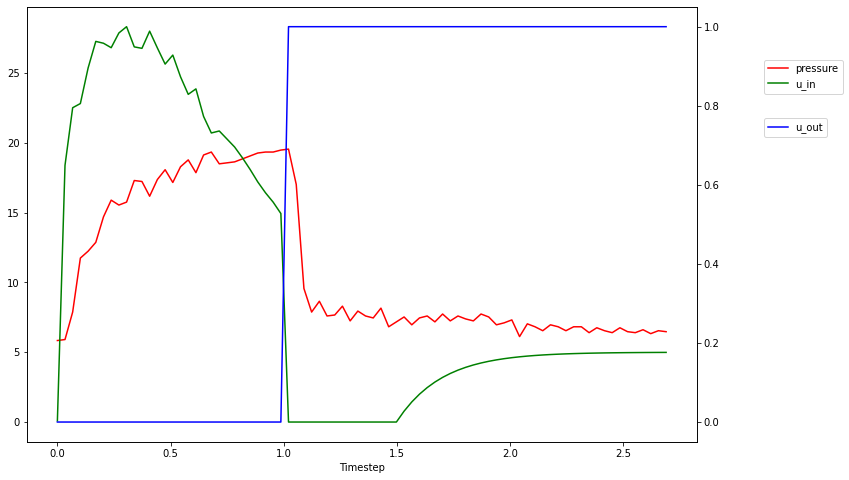

In [9]:
fig, ax1 = plt.subplots(figsize = (12, 8))

breath_1 = train[train['breath_id'] == 1]
ax2 = ax1.twinx()

ax1.plot(breath_1['time_step'], breath_1['pressure'], 'r-', label='pressure')
ax1.plot(breath_1['time_step'], breath_1['u_in'], 'g-', label='u_in')
ax2.plot(breath_1['time_step'], breath_1['u_out'], 'b-', label='u_out')

ax1.set_xlabel('Timestep')

ax1.legend(loc=(1.1, 0.8))
ax2.legend(loc=(1.1, 0.7))
plt.show()

## 피쳐 엔지니어링

In [10]:
# rewritten calculation of lag features from this notebook: https://www.kaggle.com/patrick0302/add-lag-u-in-as-new-feat
# some of ideas from this notebook: https://www.kaggle.com/mst8823/google-brain-lightgbm-baseline
train['last_value_u_in'] = train.groupby('breath_id')['u_in'].transform('last')
train['u_in_lag1'] = train.groupby('breath_id')['u_in'].shift(1)
train['u_out_lag1'] = train.groupby('breath_id')['u_out'].shift(1)
train['u_in_lag_back1'] = train.groupby('breath_id')['u_in'].shift(-1)
train['u_out_lag_back1'] = train.groupby('breath_id')['u_out'].shift(-1)
train['u_in_lag2'] = train.groupby('breath_id')['u_in'].shift(2)
train['u_out_lag2'] = train.groupby('breath_id')['u_out'].shift(2)
train['u_in_lag_back2'] = train.groupby('breath_id')['u_in'].shift(-2)
train['u_out_lag_back2'] = train.groupby('breath_id')['u_out'].shift(-2)
train['u_in_lag3'] = train.groupby('breath_id')['u_in'].shift(3)
train['u_out_lag3'] = train.groupby('breath_id')['u_out'].shift(3)
train['u_in_lag_back3'] = train.groupby('breath_id')['u_in'].shift(-3)
train['u_out_lag_back3'] = train.groupby('breath_id')['u_out'].shift(-3)
train = train.fillna(0)


train['R__C'] = train["R"].astype(str) + '__' + train["C"].astype(str)

# max value of u_in and u_out for each breath
train['breath_id__u_in__max'] = train.groupby(['breath_id'])['u_in'].transform('max')
train['breath_id__u_out__max'] = train.groupby(['breath_id'])['u_out'].transform('max')

# difference between consequitive values
train['u_in_diff1'] = train['u_in'] - train['u_in_lag1']
train['u_out_diff1'] = train['u_out'] - train['u_out_lag1']
train['u_in_diff2'] = train['u_in'] - train['u_in_lag2']
train['u_out_diff2'] = train['u_out'] - train['u_out_lag2']
# from here: https://www.kaggle.com/yasufuminakama/ventilator-pressure-lstm-starter
train.loc[train['time_step'] == 0, 'u_in_diff'] = 0
train.loc[train['time_step'] == 0, 'u_out_diff'] = 0

# difference between the current value of u_in and the max value within the breath
train['breath_id__u_in__diffmax'] = train.groupby(['breath_id'])['u_in'].transform('max') - train['u_in']
train['breath_id__u_in__diffmean'] = train.groupby(['breath_id'])['u_in'].transform('mean') - train['u_in']

# OHE
train = train.merge(pd.get_dummies(train['R'], prefix='R'), left_index=True, right_index=True).drop(['R'], axis=1)
train = train.merge(pd.get_dummies(train['C'], prefix='C'), left_index=True, right_index=True).drop(['C'], axis=1)
train = train.merge(pd.get_dummies(train['R__C'], prefix='R__C'), left_index=True, right_index=True).drop(['R__C'], axis=1)

# https://www.kaggle.com/c/ventilator-pressure-prediction/discussion/273974
train['u_in_cumsum'] = train.groupby(['breath_id'])['u_in'].cumsum()
train['time_step_cumsum'] = train.groupby(['breath_id'])['time_step'].cumsum()

In [11]:
train

,id,breath_id,time_step,u_in,u_out,pressure,last_value_u_in,u_in_lag1,u_out_lag1,u_in_lag_back1,...,R__C_20__20,R__C_20__50,R__C_50__10,R__C_50__20,R__C_50__50,R__C_5__10,R__C_5__20,R__C_5__50,u_in_cumsum,time_step_cumsum
0,1,1,0.000000,0.083334,0,5.837492,4.987079,0.000000,0.0,18.383041,...,0,1,0,0,0,0,0,0,0.083334,0.000000
1,2,1,0.033652,18.383041,0,5.907794,4.987079,0.083334,0.0,22.509278,...,0,1,0,0,0,0,0,0,18.466375,0.033652
2,3,1,0.067514,22.509278,0,7.876254,4.987079,18.383041,0.0,22.808822,...,0,1,0,0,0,0,0,0,40.975653,0.101167
3,4,1,0.101542,22.808822,0,11.742872,4.987079,22.509278,0.0,25.355850,...,0,1,0,0,0,0,0,0,63.784476,0.202709
4,5,1,0.135756,25.355850,0,12.234987,4.987079,22.808822,0.0,27.259866,...,0,1,0,0,0,0,0,0,89.140326,0.338464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6035995,6035996,125749,2.504603,1.489714,1,3.869032,1.482739,1.420711,1.0,1.488497,...,0,0,1,0,0,0,0,0,387.109297,95.147046
6035996,6035997,125749,2.537961,1.488497,1,3.869032,1.482739,1.489714,1.0,1.558978,...,0,0,1,0,0,0,0,0,388.597794,97.685006
6035997,6035998,125749,2.571408,1.558978,1,3.798729,1.482739,1.488497,1.0,1.272663,...,0,0,1,0,0,0,0,0,390.156772,100.256414
6035998,6035999,125749,2.604744,1.272663,1,4.079938,1.482739,1.558978,1.0,1.482739,...,0,0,1,0,0,0,0,0,391.429435,102.861158


In [12]:
# all the same for the test data
test['last_value_u_in'] = test.groupby('breath_id')['u_in'].transform('last')
test['u_in_lag1'] = test.groupby('breath_id')['u_in'].shift(1)
test['u_out_lag1'] = test.groupby('breath_id')['u_out'].shift(1)
test['u_in_lag_back1'] = test.groupby('breath_id')['u_in'].shift(-1)
test['u_out_lag_back1'] = test.groupby('breath_id')['u_out'].shift(-1)
test['u_in_lag2'] = test.groupby('breath_id')['u_in'].shift(2)
test['u_out_lag2'] = test.groupby('breath_id')['u_out'].shift(2)
test['u_in_lag_back2'] = test.groupby('breath_id')['u_in'].shift(-2)
test['u_out_lag_back2'] = test.groupby('breath_id')['u_out'].shift(-2)
test['u_in_lag3'] = test.groupby('breath_id')['u_in'].shift(3)
test['u_out_lag3'] = test.groupby('breath_id')['u_out'].shift(3)
test['u_in_lag_back3'] = test.groupby('breath_id')['u_in'].shift(-3)
test['u_out_lag_back3'] = test.groupby('breath_id')['u_out'].shift(-3)
test = test.fillna(0)
test['R__C'] = test["R"].astype(str) + '__' + test["C"].astype(str)

test['breath_id__u_in__max'] = test.groupby(['breath_id'])['u_in'].transform('max')
test['breath_id__u_out__max'] = test.groupby(['breath_id'])['u_out'].transform('max')

test['u_in_diff1'] = test['u_in'] - test['u_in_lag1']
test['u_out_diff1'] = test['u_out'] - test['u_out_lag1']
test['u_in_diff2'] = test['u_in'] - test['u_in_lag2']
test['u_out_diff2'] = test['u_out'] - test['u_out_lag2']
test.loc[test['time_step'] == 0, 'u_in_diff'] = 0
test.loc[test['time_step'] == 0, 'u_out_diff'] = 0

test['breath_id__u_in__diffmax'] = test.groupby(['breath_id'])['u_in'].transform('max') - test['u_in']
test['breath_id__u_in__diffmean'] = test.groupby(['breath_id'])['u_in'].transform('mean') - test['u_in']

test = test.merge(pd.get_dummies(test['R'], prefix='R'), left_index=True, right_index=True).drop(['R'], axis=1)
test = test.merge(pd.get_dummies(test['C'], prefix='C'), left_index=True, right_index=True).drop(['C'], axis=1)
test = test.merge(pd.get_dummies(test['R__C'], prefix='R__C'), left_index=True, right_index=True).drop(['R__C'], axis=1)

test['u_in_cumsum'] = test.groupby(['breath_id'])['u_in'].cumsum()
test['time_step_cumsum'] = test.groupby(['breath_id'])['time_step'].cumsum()

In [13]:
test

,id,breath_id,time_step,u_in,u_out,last_value_u_in,u_in_lag1,u_out_lag1,u_in_lag_back1,u_out_lag_back1,...,R__C_20__20,R__C_20__50,R__C_50__10,R__C_50__20,R__C_50__50,R__C_5__10,R__C_5__20,R__C_5__50,u_in_cumsum,time_step_cumsum
0,1,0,0.000000,0.000000,0,4.973375,0.000000,0.0,7.515046,0.0,...,0,0,0,0,0,0,1,0,0.000000,0.000000
1,2,0,0.031904,7.515046,0,4.973375,0.000000,0.0,14.651675,0.0,...,0,0,0,0,0,0,1,0,7.515046,0.031904
2,3,0,0.063827,14.651675,0,4.973375,7.515046,0.0,21.230610,0.0,...,0,0,0,0,0,0,1,0,22.166721,0.095731
3,4,0,0.095751,21.230610,0,4.973375,14.651675,0.0,26.320956,0.0,...,0,0,0,0,0,0,1,0,43.397331,0.191482
4,5,0,0.127644,26.320956,0,4.973375,21.230610,0.0,30.486938,0.0,...,0,0,0,0,0,0,1,0,69.718287,0.319126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4023995,4023996,125748,2.530117,4.971245,1,4.985373,4.965959,1.0,4.975709,1.0,...,0,0,0,0,0,0,0,0,194.714841,96.057459
4023996,4023997,125748,2.563853,4.975709,1,4.985373,4.971245,1.0,4.979468,1.0,...,0,0,0,0,0,0,0,0,199.690549,98.621312
4023997,4023998,125748,2.597475,4.979468,1,4.985373,4.975709,1.0,4.982648,1.0,...,0,0,0,0,0,0,0,0,204.670017,101.218787
4023998,4023999,125748,2.631134,4.982648,1,4.985373,4.979468,1.0,4.985373,1.0,...,0,0,0,0,0,0,0,0,209.652665,103.849920


## 깃허브 연동하기

https://biology-statistics-programming.tistory.com/16?category=973652

https://velog.io/@chandni_ml/3.-%EA%B9%83%ED%97%88%EB%B8%8C-%EC%A3%BC%ED%94%BC%ED%84%B0-%EB%85%B8%ED%8A%B8%EB%B6%81-%EB%A7%88%ED%81%AC%EB%8B%A4%EC%9A%B4

In [14]:
!git --version

git version 2.7.4


In [15]:
!git config --global user.email "jonghee89@naver.com"

In [16]:
!git config --global user.name "k-107"

In [17]:
!git config -l

user.email=jonghee89@naver.com
user.name=k-107


## informer 가져오기

In [20]:
%cd ..

/home/ubuntu/jonghee


In [21]:
!mkdir gitclone

In [22]:
!ls

dataset  gitclone  jonghee.ipynb


In [23]:
%cd gitclone

/home/ubuntu/jonghee/gitclone


In [24]:
!git clone https://github.com/zhouhaoyi/Informer2020.git

Cloning into 'Informer2020'...
remote: Enumerating objects: 538, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 538 (delta 0), reused 0 (delta 0), pack-reused 535
Receiving objects: 100% (538/538), 6.48 MiB | 7.42 MiB/s, done.
Resolving deltas: 100% (306/306), done.
Checking connectivity... done.


In [25]:
!pwd

/home/ubuntu/jonghee/gitclone


In [27]:
!ls

Informer2020


In [28]:
%cd Informer2020

/home/ubuntu/jonghee/gitclone/Informer2020


In [29]:
!pip install -r requirements.txt

Looking in indexes: http://ftp.daumkakao.com/pypi/simple
     |████████████████████████████████| 13.1 MB 26.1 MB/s eta 0:00:01
     |████████████████████████████████| 14.5 MB 112.6 MB/s eta 0:00:01
     |████████████████████████████████| 10.4 MB 103.8 MB/s eta 0:00:01
     |████████████████████████████████| 6.7 MB 101.3 MB/s eta 0:00:01
     |████████████████████████████████| 735.5 MB 88.2 MB/s eta 0:00:013
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.1
    Uninstalling scikit-learn-1.0.1:
      Successfully uninstalled scikit-learn-1.0.1
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.4.3
    Uninstalling matplotl

## 인포머에 넣을 수 있는 형태로 데이터 가공하기

https://min23th.tistory.com/24

In [30]:
train

,id,breath_id,time_step,u_in,u_out,pressure,last_value_u_in,u_in_lag1,u_out_lag1,u_in_lag_back1,...,R__C_20__20,R__C_20__50,R__C_50__10,R__C_50__20,R__C_50__50,R__C_5__10,R__C_5__20,R__C_5__50,u_in_cumsum,time_step_cumsum
0,1,1,0.000000,0.083334,0,5.837492,4.987079,0.000000,0.0,18.383041,...,0,1,0,0,0,0,0,0,0.083334,0.000000
1,2,1,0.033652,18.383041,0,5.907794,4.987079,0.083334,0.0,22.509278,...,0,1,0,0,0,0,0,0,18.466375,0.033652
2,3,1,0.067514,22.509278,0,7.876254,4.987079,18.383041,0.0,22.808822,...,0,1,0,0,0,0,0,0,40.975653,0.101167
3,4,1,0.101542,22.808822,0,11.742872,4.987079,22.509278,0.0,25.355850,...,0,1,0,0,0,0,0,0,63.784476,0.202709
4,5,1,0.135756,25.355850,0,12.234987,4.987079,22.808822,0.0,27.259866,...,0,1,0,0,0,0,0,0,89.140326,0.338464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6035995,6035996,125749,2.504603,1.489714,1,3.869032,1.482739,1.420711,1.0,1.488497,...,0,0,1,0,0,0,0,0,387.109297,95.147046
6035996,6035997,125749,2.537961,1.488497,1,3.869032,1.482739,1.489714,1.0,1.558978,...,0,0,1,0,0,0,0,0,388.597794,97.685006
6035997,6035998,125749,2.571408,1.558978,1,3.798729,1.482739,1.488497,1.0,1.272663,...,0,0,1,0,0,0,0,0,390.156772,100.256414
6035998,6035999,125749,2.604744,1.272663,1,4.079938,1.482739,1.558978,1.0,1.482739,...,0,0,1,0,0,0,0,0,391.429435,102.861158


In [31]:
test

,id,breath_id,time_step,u_in,u_out,last_value_u_in,u_in_lag1,u_out_lag1,u_in_lag_back1,u_out_lag_back1,...,R__C_20__20,R__C_20__50,R__C_50__10,R__C_50__20,R__C_50__50,R__C_5__10,R__C_5__20,R__C_5__50,u_in_cumsum,time_step_cumsum
0,1,0,0.000000,0.000000,0,4.973375,0.000000,0.0,7.515046,0.0,...,0,0,0,0,0,0,1,0,0.000000,0.000000
1,2,0,0.031904,7.515046,0,4.973375,0.000000,0.0,14.651675,0.0,...,0,0,0,0,0,0,1,0,7.515046,0.031904
2,3,0,0.063827,14.651675,0,4.973375,7.515046,0.0,21.230610,0.0,...,0,0,0,0,0,0,1,0,22.166721,0.095731
3,4,0,0.095751,21.230610,0,4.973375,14.651675,0.0,26.320956,0.0,...,0,0,0,0,0,0,1,0,43.397331,0.191482
4,5,0,0.127644,26.320956,0,4.973375,21.230610,0.0,30.486938,0.0,...,0,0,0,0,0,0,1,0,69.718287,0.319126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4023995,4023996,125748,2.530117,4.971245,1,4.985373,4.965959,1.0,4.975709,1.0,...,0,0,0,0,0,0,0,0,194.714841,96.057459
4023996,4023997,125748,2.563853,4.975709,1,4.985373,4.971245,1.0,4.979468,1.0,...,0,0,0,0,0,0,0,0,199.690549,98.621312
4023997,4023998,125748,2.597475,4.979468,1,4.985373,4.975709,1.0,4.982648,1.0,...,0,0,0,0,0,0,0,0,204.670017,101.218787
4023998,4023999,125748,2.631134,4.982648,1,4.985373,4.979468,1.0,4.985373,1.0,...,0,0,0,0,0,0,0,0,209.652665,103.849920


In [39]:
# not in 사용 방법!!
# https://stackoverflow.com/questions/19960077/how-to-filter-pandas-dataframe-using-in-and-not-in-like-in-sql

train.columns[~train.columns.isin(test.columns)]

Index(['pressure'], dtype='object')

In [43]:
train[train.pressure==0]
# pressure가 0인 건 없다.

,id,breath_id,time_step,u_in,u_out,pressure,last_value_u_in,u_in_lag1,u_out_lag1,u_in_lag_back1,...,R__C_20__20,R__C_20__50,R__C_50__10,R__C_50__20,R__C_50__50,R__C_5__10,R__C_5__20,R__C_5__50,u_in_cumsum,time_step_cumsum


In [46]:
# 테스트와 트레인을 합치기 위해서 테스트에 없는 컬럼인 pressure를 0으로 맞춰서 넣어준다.

test['pressure'] = 0
test

,id,breath_id,time_step,u_in,u_out,last_value_u_in,u_in_lag1,u_out_lag1,u_in_lag_back1,u_out_lag_back1,...,R__C_20__50,R__C_50__10,R__C_50__20,R__C_50__50,R__C_5__10,R__C_5__20,R__C_5__50,u_in_cumsum,time_step_cumsum,pressure
0,1,0,0.000000,0.000000,0,4.973375,0.000000,0.0,7.515046,0.0,...,0,0,0,0,0,1,0,0.000000,0.000000,0
1,2,0,0.031904,7.515046,0,4.973375,0.000000,0.0,14.651675,0.0,...,0,0,0,0,0,1,0,7.515046,0.031904,0
2,3,0,0.063827,14.651675,0,4.973375,7.515046,0.0,21.230610,0.0,...,0,0,0,0,0,1,0,22.166721,0.095731,0
3,4,0,0.095751,21.230610,0,4.973375,14.651675,0.0,26.320956,0.0,...,0,0,0,0,0,1,0,43.397331,0.191482,0
4,5,0,0.127644,26.320956,0,4.973375,21.230610,0.0,30.486938,0.0,...,0,0,0,0,0,1,0,69.718287,0.319126,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4023995,4023996,125748,2.530117,4.971245,1,4.985373,4.965959,1.0,4.975709,1.0,...,0,0,0,0,0,0,0,194.714841,96.057459,0
4023996,4023997,125748,2.563853,4.975709,1,4.985373,4.971245,1.0,4.979468,1.0,...,0,0,0,0,0,0,0,199.690549,98.621312,0
4023997,4023998,125748,2.597475,4.979468,1,4.985373,4.975709,1.0,4.982648,1.0,...,0,0,0,0,0,0,0,204.670017,101.218787,0
4023998,4023999,125748,2.631134,4.982648,1,4.985373,4.979468,1.0,4.985373,1.0,...,0,0,0,0,0,0,0,209.652665,103.849920,0


In [70]:
# 트레인과 테스트 합치기

train_test = pd.concat([train,test], axis=0)
train_test

,id,breath_id,time_step,u_in,u_out,pressure,last_value_u_in,u_in_lag1,u_out_lag1,u_in_lag_back1,...,R__C_20__20,R__C_20__50,R__C_50__10,R__C_50__20,R__C_50__50,R__C_5__10,R__C_5__20,R__C_5__50,u_in_cumsum,time_step_cumsum
0,1,1,0.000000,0.083334,0,5.837492,4.987079,0.000000,0.0,18.383041,...,0,1,0,0,0,0,0,0,0.083334,0.000000
1,2,1,0.033652,18.383041,0,5.907794,4.987079,0.083334,0.0,22.509278,...,0,1,0,0,0,0,0,0,18.466375,0.033652
2,3,1,0.067514,22.509278,0,7.876254,4.987079,18.383041,0.0,22.808822,...,0,1,0,0,0,0,0,0,40.975653,0.101167
3,4,1,0.101542,22.808822,0,11.742872,4.987079,22.509278,0.0,25.355850,...,0,1,0,0,0,0,0,0,63.784476,0.202709
4,5,1,0.135756,25.355850,0,12.234987,4.987079,22.808822,0.0,27.259866,...,0,1,0,0,0,0,0,0,89.140326,0.338464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4023995,4023996,125748,2.530117,4.971245,1,0.000000,4.985373,4.965959,1.0,4.975709,...,0,0,0,0,0,0,0,0,194.714841,96.057459
4023996,4023997,125748,2.563853,4.975709,1,0.000000,4.985373,4.971245,1.0,4.979468,...,0,0,0,0,0,0,0,0,199.690549,98.621312
4023997,4023998,125748,2.597475,4.979468,1,0.000000,4.985373,4.975709,1.0,4.982648,...,0,0,0,0,0,0,0,0,204.670017,101.218787
4023998,4023999,125748,2.631134,4.982648,1,0.000000,4.985373,4.979468,1.0,4.985373,...,0,0,0,0,0,0,0,0,209.652665,103.849920


In [71]:
train_test = train_test.sort_values(by=['breath_id', 'time_step'], ascending=True).reset_index()
train_test

,index,id,breath_id,time_step,u_in,u_out,pressure,last_value_u_in,u_in_lag1,u_out_lag1,...,R__C_20__20,R__C_20__50,R__C_50__10,R__C_50__20,R__C_50__50,R__C_5__10,R__C_5__20,R__C_5__50,u_in_cumsum,time_step_cumsum
0,0,1,0,0.000000,0.000000,0,0.000000,4.973375,0.000000,0.0,...,0,0,0,0,0,0,1,0,0.000000,0.000000
1,1,2,0,0.031904,7.515046,0,0.000000,4.973375,0.000000,0.0,...,0,0,0,0,0,0,1,0,7.515046,0.031904
2,2,3,0,0.063827,14.651675,0,0.000000,4.973375,7.515046,0.0,...,0,0,0,0,0,0,1,0,22.166721,0.095731
3,3,4,0,0.095751,21.230610,0,0.000000,4.973375,14.651675,0.0,...,0,0,0,0,0,0,1,0,43.397331,0.191482
4,4,5,0,0.127644,26.320956,0,0.000000,4.973375,21.230610,0.0,...,0,0,0,0,0,0,1,0,69.718287,0.319126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10059995,6035995,6035996,125749,2.504603,1.489714,1,3.869032,1.482739,1.420711,1.0,...,0,0,1,0,0,0,0,0,387.109297,95.147046
10059996,6035996,6035997,125749,2.537961,1.488497,1,3.869032,1.482739,1.489714,1.0,...,0,0,1,0,0,0,0,0,388.597794,97.685006
10059997,6035997,6035998,125749,2.571408,1.558978,1,3.798729,1.482739,1.488497,1.0,...,0,0,1,0,0,0,0,0,390.156772,100.256414
10059998,6035998,6035999,125749,2.604744,1.272663,1,4.079938,1.482739,1.558978,1.0,...,0,0,1,0,0,0,0,0,391.429435,102.861158


In [72]:
train_test.drop('index',axis=1,inplace=True)

In [73]:
train_test

,id,breath_id,time_step,u_in,u_out,pressure,last_value_u_in,u_in_lag1,u_out_lag1,u_in_lag_back1,...,R__C_20__20,R__C_20__50,R__C_50__10,R__C_50__20,R__C_50__50,R__C_5__10,R__C_5__20,R__C_5__50,u_in_cumsum,time_step_cumsum
0,1,0,0.000000,0.000000,0,0.000000,4.973375,0.000000,0.0,7.515046,...,0,0,0,0,0,0,1,0,0.000000,0.000000
1,2,0,0.031904,7.515046,0,0.000000,4.973375,0.000000,0.0,14.651675,...,0,0,0,0,0,0,1,0,7.515046,0.031904
2,3,0,0.063827,14.651675,0,0.000000,4.973375,7.515046,0.0,21.230610,...,0,0,0,0,0,0,1,0,22.166721,0.095731
3,4,0,0.095751,21.230610,0,0.000000,4.973375,14.651675,0.0,26.320956,...,0,0,0,0,0,0,1,0,43.397331,0.191482
4,5,0,0.127644,26.320956,0,0.000000,4.973375,21.230610,0.0,30.486938,...,0,0,0,0,0,0,1,0,69.718287,0.319126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10059995,6035996,125749,2.504603,1.489714,1,3.869032,1.482739,1.420711,1.0,1.488497,...,0,0,1,0,0,0,0,0,387.109297,95.147046
10059996,6035997,125749,2.537961,1.488497,1,3.869032,1.482739,1.489714,1.0,1.558978,...,0,0,1,0,0,0,0,0,388.597794,97.685006
10059997,6035998,125749,2.571408,1.558978,1,3.798729,1.482739,1.488497,1.0,1.272663,...,0,0,1,0,0,0,0,0,390.156772,100.256414
10059998,6035999,125749,2.604744,1.272663,1,4.079938,1.482739,1.558978,1.0,1.482739,...,0,0,1,0,0,0,0,0,391.429435,102.861158


In [74]:
train_test[train_test.time_step_cumsum>100]
# 트레인과 테스트를 가지고 cumsum을 한 것이 아니다! 그러므로 전체 데이테로 해서 날짜로 변환해보자!

,id,breath_id,time_step,u_in,u_out,pressure,last_value_u_in,u_in_lag1,u_out_lag1,u_in_lag_back1,...,R__C_20__20,R__C_20__50,R__C_50__10,R__C_50__20,R__C_50__50,R__C_5__10,R__C_5__20,R__C_5__50,u_in_cumsum,time_step_cumsum
79,80,0,2.519844,4.973375,1,0.000000,4.973375,4.968767,1.0,0.000000,...,0,0,0,0,0,0,1,0,746.187002,100.803011
157,78,1,2.621773,4.981847,1,6.329607,4.987079,4.978481,1.0,4.984683,...,0,1,0,0,0,0,0,0,801.708762,102.222974
158,79,1,2.655746,4.984683,1,6.540513,4.987079,4.981847,1.0,4.987079,...,0,1,0,0,0,0,0,0,806.693445,104.878720
159,80,1,2.689766,4.987079,1,6.470211,4.987079,4.984683,1.0,0.000000,...,0,1,0,0,0,0,0,0,811.680524,107.568486
237,158,2,2.622476,4.983857,1,4.993866,4.988518,4.980860,1.0,4.986382,...,1,0,0,0,0,0,0,0,397.524880,102.202542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10059918,4023999,125748,2.631134,4.982648,1,0.000000,4.985373,4.979468,1.0,4.985373,...,0,0,0,0,0,0,0,0,209.652665,103.849920
10059919,4024000,125748,2.665301,4.985373,1,0.000000,4.985373,4.982648,1.0,0.000000,...,0,0,0,0,0,0,0,0,214.638038,106.515221
10059997,6035998,125749,2.571408,1.558978,1,3.798729,1.482739,1.488497,1.0,1.272663,...,0,0,1,0,0,0,0,0,390.156772,100.256414
10059998,6035999,125749,2.604744,1.272663,1,4.079938,1.482739,1.558978,1.0,1.482739,...,0,0,1,0,0,0,0,0,391.429435,102.861158


In [75]:
train_test[train_test.breath_id==0]

,id,breath_id,time_step,u_in,u_out,pressure,last_value_u_in,u_in_lag1,u_out_lag1,u_in_lag_back1,...,R__C_20__20,R__C_20__50,R__C_50__10,R__C_50__20,R__C_50__50,R__C_5__10,R__C_5__20,R__C_5__50,u_in_cumsum,time_step_cumsum
0,1,0,0.000000,0.000000,0,0.0,4.973375,0.000000,0.0,7.515046,...,0,0,0,0,0,0,1,0,0.000000,0.000000
1,2,0,0.031904,7.515046,0,0.0,4.973375,0.000000,0.0,14.651675,...,0,0,0,0,0,0,1,0,7.515046,0.031904
2,3,0,0.063827,14.651675,0,0.0,4.973375,7.515046,0.0,21.230610,...,0,0,0,0,0,0,1,0,22.166721,0.095731
3,4,0,0.095751,21.230610,0,0.0,4.973375,14.651675,0.0,26.320956,...,0,0,0,0,0,0,1,0,43.397331,0.191482
4,5,0,0.127644,26.320956,0,0.0,4.973375,21.230610,0.0,30.486938,...,0,0,0,0,0,0,1,0,69.718287,0.319126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,76,0,2.392146,4.949582,1,0.0,4.973375,4.940853,1.0,4.957020,...,0,0,0,0,0,0,1,0,726.324476,90.915174
76,77,0,2.424070,4.957020,1,0.0,4.973375,4.949582,1.0,4.963363,...,0,0,0,0,0,0,1,0,731.281497,93.339244
77,78,0,2.456003,4.963363,1,0.0,4.973375,4.957020,1.0,4.968767,...,0,0,0,0,0,0,1,0,736.244860,95.795247
78,79,0,2.487921,4.968767,1,0.0,4.973375,4.963363,1.0,4.973375,...,0,0,0,0,0,0,1,0,741.213627,98.283167


In [76]:
train_test.groupby(['breath_id']).count()
# 모든 breath_id 마다 80개씩 타임 스텝이 있다.

,id,time_step,u_in,u_out,pressure,last_value_u_in,u_in_lag1,u_out_lag1,u_in_lag_back1,u_out_lag_back1,...,R__C_20__20,R__C_20__50,R__C_50__10,R__C_50__20,R__C_50__50,R__C_5__10,R__C_5__20,R__C_5__50,u_in_cumsum,time_step_cumsum
breath_id,,,,,,,,,,,,,,,,,,,,,
0,80,80,80,80,80,80,80,80,80,80,...,80,80,80,80,80,80,80,80,80,80
1,80,80,80,80,80,80,80,80,80,80,...,80,80,80,80,80,80,80,80,80,80
2,80,80,80,80,80,80,80,80,80,80,...,80,80,80,80,80,80,80,80,80,80
3,80,80,80,80,80,80,80,80,80,80,...,80,80,80,80,80,80,80,80,80,80
4,80,80,80,80,80,80,80,80,80,80,...,80,80,80,80,80,80,80,80,80,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125745,80,80,80,80,80,80,80,80,80,80,...,80,80,80,80,80,80,80,80,80,80
125746,80,80,80,80,80,80,80,80,80,80,...,80,80,80,80,80,80,80,80,80,80
125747,80,80,80,80,80,80,80,80,80,80,...,80,80,80,80,80,80,80,80,80,80


In [77]:
# 날짜 시간으로 바꾸기 위해서 cumsum 했다.
train_test['total_time_step_cumsum'] = train_test.time_step.cumsum(axis=0)

In [80]:
train_test.total_time_step_cumsum += 1

In [81]:
train_test

,id,breath_id,time_step,u_in,u_out,pressure,last_value_u_in,u_in_lag1,u_out_lag1,u_in_lag_back1,...,R__C_20__50,R__C_50__10,R__C_50__20,R__C_50__50,R__C_5__10,R__C_5__20,R__C_5__50,u_in_cumsum,time_step_cumsum,total_time_step_cumsum
0,1,0,0.000000,0.000000,0,0.000000,4.973375,0.000000,0.0,7.515046,...,0,0,0,0,0,1,0,0.000000,0.000000,1.000000e+00
1,2,0,0.031904,7.515046,0,0.000000,4.973375,0.000000,0.0,14.651675,...,0,0,0,0,0,1,0,7.515046,0.031904,1.031904e+00
2,3,0,0.063827,14.651675,0,0.000000,4.973375,7.515046,0.0,21.230610,...,0,0,0,0,0,1,0,22.166721,0.095731,1.095731e+00
3,4,0,0.095751,21.230610,0,0.000000,4.973375,14.651675,0.0,26.320956,...,0,0,0,0,0,1,0,43.397331,0.191482,1.191482e+00
4,5,0,0.127644,26.320956,0,0.000000,4.973375,21.230610,0.0,30.486938,...,0,0,0,0,0,1,0,69.718287,0.319126,1.319126e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10059995,6035996,125749,2.504603,1.489714,1,3.869032,1.482739,1.420711,1.0,1.488497,...,0,1,0,0,0,0,0,387.109297,95.147046,1.315010e+07
10059996,6035997,125749,2.537961,1.488497,1,3.869032,1.482739,1.489714,1.0,1.558978,...,0,1,0,0,0,0,0,388.597794,97.685006,1.315011e+07
10059997,6035998,125749,2.571408,1.558978,1,3.798729,1.482739,1.488497,1.0,1.272663,...,0,1,0,0,0,0,0,390.156772,100.256414,1.315011e+07
10059998,6035999,125749,2.604744,1.272663,1,4.079938,1.482739,1.558978,1.0,1.482739,...,0,1,0,0,0,0,0,391.429435,102.861158,1.315011e+07


In [79]:
# 큰일났다....구분이 안된다 나중에는!!
1.315011e+07

13150110.0

In [83]:
train_test.time_step.max()

2.9372379779815674

In [84]:
train_test.	total_time_step_cumsum.max()
# 휴 구분되어있다!

13150113.971713066

In [89]:
13150113.971713066*10**9
# 10^9해서 초로 변환하자!

1.3150113971713066e+16

In [92]:
train_test['total_time_step_cumsum'] = train_test.total_time_step_cumsum*10**9
train_test

,id,breath_id,time_step,u_in,u_out,pressure,last_value_u_in,u_in_lag1,u_out_lag1,u_in_lag_back1,...,R__C_20__50,R__C_50__10,R__C_50__20,R__C_50__50,R__C_5__10,R__C_5__20,R__C_5__50,u_in_cumsum,time_step_cumsum,total_time_step_cumsum
0,1,0,0.000000,0.000000,0,0.000000,4.973375,0.000000,0.0,7.515046,...,0,0,0,0,0,1,0,0.000000,0.000000,1.000000e+09
1,2,0,0.031904,7.515046,0,0.000000,4.973375,0.000000,0.0,14.651675,...,0,0,0,0,0,1,0,7.515046,0.031904,1.031904e+09
2,3,0,0.063827,14.651675,0,0.000000,4.973375,7.515046,0.0,21.230610,...,0,0,0,0,0,1,0,22.166721,0.095731,1.095731e+09
3,4,0,0.095751,21.230610,0,0.000000,4.973375,14.651675,0.0,26.320956,...,0,0,0,0,0,1,0,43.397331,0.191482,1.191482e+09
4,5,0,0.127644,26.320956,0,0.000000,4.973375,21.230610,0.0,30.486938,...,0,0,0,0,0,1,0,69.718287,0.319126,1.319126e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10059995,6035996,125749,2.504603,1.489714,1,3.869032,1.482739,1.420711,1.0,1.488497,...,0,1,0,0,0,0,0,387.109297,95.147046,1.315010e+16
10059996,6035997,125749,2.537961,1.488497,1,3.869032,1.482739,1.489714,1.0,1.558978,...,0,1,0,0,0,0,0,388.597794,97.685006,1.315011e+16
10059997,6035998,125749,2.571408,1.558978,1,3.798729,1.482739,1.488497,1.0,1.272663,...,0,1,0,0,0,0,0,390.156772,100.256414,1.315011e+16
10059998,6035999,125749,2.604744,1.272663,1,4.079938,1.482739,1.558978,1.0,1.482739,...,0,1,0,0,0,0,0,391.429435,102.861158,1.315011e+16


In [93]:
train_test.	total_time_step_cumsum.max()

1.3150113971713066e+16

### 날짜 변환

In [178]:
train_test.time_step.max()

2.9372379779815674

In [139]:
train_test.	total_time_step_cumsum.max()/60/60/24/365
#와 이게 몇년이야...아무래도 반올림을 해야겠다!! 아니다 그냥 가즈아~~

416987378.6058177

In [110]:
import datetime

In [140]:
now = '1315011397171'
date = datetime.datetime.fromtimestamp(int(now)).strftime('%Y-%m-%d %H:%M:%S')
print(date)
# 5자리를 빼야지만 인식가능하다.

ValueError: year 43641 is out of range

In [152]:
now = '199999999999'
date = datetime.datetime.fromtimestamp(int(now)).strftime('%Y-%m-%d %H:%M:%S')
print(date)

8307-10-02 04:33:19


In [141]:
now = '-59999999999'
date = datetime.datetime.fromtimestamp(int(now)).strftime('%Y-%m-%d %H:%M:%S')
print(date)

68-09-03 21:47:53


In [154]:
199999999999+59999999999
# -까지 생각하면 259999999998이 맥시멈이다.
# 전체 데이터 수가 10060000이니까 그냥 1초단위로 변환해서 입력시키는 게 나을꺼같애...
''''
total_time_step_cumsum을 결국 드랍하자. informer는 date 컬럼이 반드시 필요하고 내부를 까보니까 date를 datetime으로 형변환한다.
그냥 1초 단위로 date 컬럼을 만들어주자.
일단 모델에 넣어서 봐야하니까!!
''''

259999999998

In [155]:
train_test.drop(['total_time_step_cumsum'], axis=1, inplace=True)

In [159]:
train_test = train_test.reset_index()
train_test

,index,id,breath_id,time_step,u_in,u_out,pressure,last_value_u_in,u_in_lag1,u_out_lag1,...,R__C_20__20,R__C_20__50,R__C_50__10,R__C_50__20,R__C_50__50,R__C_5__10,R__C_5__20,R__C_5__50,u_in_cumsum,time_step_cumsum
0,0,1,0,0.000000,0.000000,0,0.000000,4.973375,0.000000,0.0,...,0,0,0,0,0,0,1,0,0.000000,0.000000
1,1,2,0,0.031904,7.515046,0,0.000000,4.973375,0.000000,0.0,...,0,0,0,0,0,0,1,0,7.515046,0.031904
2,2,3,0,0.063827,14.651675,0,0.000000,4.973375,7.515046,0.0,...,0,0,0,0,0,0,1,0,22.166721,0.095731
3,3,4,0,0.095751,21.230610,0,0.000000,4.973375,14.651675,0.0,...,0,0,0,0,0,0,1,0,43.397331,0.191482
4,4,5,0,0.127644,26.320956,0,0.000000,4.973375,21.230610,0.0,...,0,0,0,0,0,0,1,0,69.718287,0.319126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10059995,10059995,6035996,125749,2.504603,1.489714,1,3.869032,1.482739,1.420711,1.0,...,0,0,1,0,0,0,0,0,387.109297,95.147046
10059996,10059996,6035997,125749,2.537961,1.488497,1,3.869032,1.482739,1.489714,1.0,...,0,0,1,0,0,0,0,0,388.597794,97.685006
10059997,10059997,6035998,125749,2.571408,1.558978,1,3.798729,1.482739,1.488497,1.0,...,0,0,1,0,0,0,0,0,390.156772,100.256414
10059998,10059998,6035999,125749,2.604744,1.272663,1,4.079938,1.482739,1.558978,1.0,...,0,0,1,0,0,0,0,0,391.429435,102.861158


In [165]:
train_test.index
# 컬럼에 인덱스가 있어도 행번호인 인덱스로 인식된다!

RangeIndex(start=0, stop=10060000, step=1)

In [166]:
# 컬럼 이름 바꾸기
train_test = train_test.rename(columns={'index':'date'})
train_test

,date,id,breath_id,time_step,u_in,u_out,pressure,last_value_u_in,u_in_lag1,u_out_lag1,...,R__C_20__20,R__C_20__50,R__C_50__10,R__C_50__20,R__C_50__50,R__C_5__10,R__C_5__20,R__C_5__50,u_in_cumsum,time_step_cumsum
0,0,1,0,0.000000,0.000000,0,0.000000,4.973375,0.000000,0.0,...,0,0,0,0,0,0,1,0,0.000000,0.000000
1,1,2,0,0.031904,7.515046,0,0.000000,4.973375,0.000000,0.0,...,0,0,0,0,0,0,1,0,7.515046,0.031904
2,2,3,0,0.063827,14.651675,0,0.000000,4.973375,7.515046,0.0,...,0,0,0,0,0,0,1,0,22.166721,0.095731
3,3,4,0,0.095751,21.230610,0,0.000000,4.973375,14.651675,0.0,...,0,0,0,0,0,0,1,0,43.397331,0.191482
4,4,5,0,0.127644,26.320956,0,0.000000,4.973375,21.230610,0.0,...,0,0,0,0,0,0,1,0,69.718287,0.319126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10059995,10059995,6035996,125749,2.504603,1.489714,1,3.869032,1.482739,1.420711,1.0,...,0,0,1,0,0,0,0,0,387.109297,95.147046
10059996,10059996,6035997,125749,2.537961,1.488497,1,3.869032,1.482739,1.489714,1.0,...,0,0,1,0,0,0,0,0,388.597794,97.685006
10059997,10059997,6035998,125749,2.571408,1.558978,1,3.798729,1.482739,1.488497,1.0,...,0,0,1,0,0,0,0,0,390.156772,100.256414
10059998,10059998,6035999,125749,2.604744,1.272663,1,4.079938,1.482739,1.558978,1.0,...,0,0,1,0,0,0,0,0,391.429435,102.861158


In [167]:
def change_index_to_date(value):
    date = datetime.datetime.fromtimestamp(int(value)).strftime('%Y-%m-%d %H:%M:%S')
    return date

train_test.date = train_test.date.apply(lambda x: change_index_to_date(x))
train_test.date

0           1970-01-01 09:00:00
1           1970-01-01 09:00:01
2           1970-01-01 09:00:02
3           1970-01-01 09:00:03
4           1970-01-01 09:00:04
                   ...         
10059995    1970-04-27 19:26:35
10059996    1970-04-27 19:26:36
10059997    1970-04-27 19:26:37
10059998    1970-04-27 19:26:38
10059999    1970-04-27 19:26:39
Name: date, Length: 10060000, dtype: object

In [168]:
train_test

,date,id,breath_id,time_step,u_in,u_out,pressure,last_value_u_in,u_in_lag1,u_out_lag1,...,R__C_20__20,R__C_20__50,R__C_50__10,R__C_50__20,R__C_50__50,R__C_5__10,R__C_5__20,R__C_5__50,u_in_cumsum,time_step_cumsum
0,1970-01-01 09:00:00,1,0,0.000000,0.000000,0,0.000000,4.973375,0.000000,0.0,...,0,0,0,0,0,0,1,0,0.000000,0.000000
1,1970-01-01 09:00:01,2,0,0.031904,7.515046,0,0.000000,4.973375,0.000000,0.0,...,0,0,0,0,0,0,1,0,7.515046,0.031904
2,1970-01-01 09:00:02,3,0,0.063827,14.651675,0,0.000000,4.973375,7.515046,0.0,...,0,0,0,0,0,0,1,0,22.166721,0.095731
3,1970-01-01 09:00:03,4,0,0.095751,21.230610,0,0.000000,4.973375,14.651675,0.0,...,0,0,0,0,0,0,1,0,43.397331,0.191482
4,1970-01-01 09:00:04,5,0,0.127644,26.320956,0,0.000000,4.973375,21.230610,0.0,...,0,0,0,0,0,0,1,0,69.718287,0.319126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10059995,1970-04-27 19:26:35,6035996,125749,2.504603,1.489714,1,3.869032,1.482739,1.420711,1.0,...,0,0,1,0,0,0,0,0,387.109297,95.147046
10059996,1970-04-27 19:26:36,6035997,125749,2.537961,1.488497,1,3.869032,1.482739,1.489714,1.0,...,0,0,1,0,0,0,0,0,388.597794,97.685006
10059997,1970-04-27 19:26:37,6035998,125749,2.571408,1.558978,1,3.798729,1.482739,1.488497,1.0,...,0,0,1,0,0,0,0,0,390.156772,100.256414
10059998,1970-04-27 19:26:38,6035999,125749,2.604744,1.272663,1,4.079938,1.482739,1.558978,1.0,...,0,0,1,0,0,0,0,0,391.429435,102.861158


In [175]:
# train_test를 훈련, 테스트 데이터로 분리!
df_train = train_test[train_test.pressure!=0].reset_index()
df_train.drop('index',axis=1,inplace=True)
df_train

,date,id,breath_id,time_step,u_in,u_out,pressure,last_value_u_in,u_in_lag1,u_out_lag1,...,R__C_20__20,R__C_20__50,R__C_50__10,R__C_50__20,R__C_50__50,R__C_5__10,R__C_5__20,R__C_5__50,u_in_cumsum,time_step_cumsum
0,1970-01-01 09:01:20,1,1,0.000000,0.083334,0,5.837492,4.987079,0.000000,0.0,...,0,1,0,0,0,0,0,0,0.083334,0.000000
1,1970-01-01 09:01:21,2,1,0.033652,18.383041,0,5.907794,4.987079,0.083334,0.0,...,0,1,0,0,0,0,0,0,18.466375,0.033652
2,1970-01-01 09:01:22,3,1,0.067514,22.509278,0,7.876254,4.987079,18.383041,0.0,...,0,1,0,0,0,0,0,0,40.975653,0.101167
3,1970-01-01 09:01:23,4,1,0.101542,22.808822,0,11.742872,4.987079,22.509278,0.0,...,0,1,0,0,0,0,0,0,63.784476,0.202709
4,1970-01-01 09:01:24,5,1,0.135756,25.355850,0,12.234987,4.987079,22.808822,0.0,...,0,1,0,0,0,0,0,0,89.140326,0.338464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6035995,1970-04-27 19:26:35,6035996,125749,2.504603,1.489714,1,3.869032,1.482739,1.420711,1.0,...,0,0,1,0,0,0,0,0,387.109297,95.147046
6035996,1970-04-27 19:26:36,6035997,125749,2.537961,1.488497,1,3.869032,1.482739,1.489714,1.0,...,0,0,1,0,0,0,0,0,388.597794,97.685006
6035997,1970-04-27 19:26:37,6035998,125749,2.571408,1.558978,1,3.798729,1.482739,1.488497,1.0,...,0,0,1,0,0,0,0,0,390.156772,100.256414
6035998,1970-04-27 19:26:38,6035999,125749,2.604744,1.272663,1,4.079938,1.482739,1.558978,1.0,...,0,0,1,0,0,0,0,0,391.429435,102.861158


In [176]:
df_test = train_test[train_test.pressure==0].reset_index()
df_test.drop('index',axis=1,inplace=True)
df_test

,date,id,breath_id,time_step,u_in,u_out,pressure,last_value_u_in,u_in_lag1,u_out_lag1,...,R__C_20__20,R__C_20__50,R__C_50__10,R__C_50__20,R__C_50__50,R__C_5__10,R__C_5__20,R__C_5__50,u_in_cumsum,time_step_cumsum
0,1970-01-01 09:00:00,1,0,0.000000,0.000000,0,0.0,4.973375,0.000000,0.0,...,0,0,0,0,0,0,1,0,0.000000,0.000000
1,1970-01-01 09:00:01,2,0,0.031904,7.515046,0,0.0,4.973375,0.000000,0.0,...,0,0,0,0,0,0,1,0,7.515046,0.031904
2,1970-01-01 09:00:02,3,0,0.063827,14.651675,0,0.0,4.973375,7.515046,0.0,...,0,0,0,0,0,0,1,0,22.166721,0.095731
3,1970-01-01 09:00:03,4,0,0.095751,21.230610,0,0.0,4.973375,14.651675,0.0,...,0,0,0,0,0,0,1,0,43.397331,0.191482
4,1970-01-01 09:00:04,5,0,0.127644,26.320956,0,0.0,4.973375,21.230610,0.0,...,0,0,0,0,0,0,1,0,69.718287,0.319126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4023995,1970-04-27 19:25:15,4023996,125748,2.530117,4.971245,1,0.0,4.985373,4.965959,1.0,...,0,0,0,0,0,0,0,0,194.714841,96.057459
4023996,1970-04-27 19:25:16,4023997,125748,2.563853,4.975709,1,0.0,4.985373,4.971245,1.0,...,0,0,0,0,0,0,0,0,199.690549,98.621312
4023997,1970-04-27 19:25:17,4023998,125748,2.597475,4.979468,1,0.0,4.985373,4.975709,1.0,...,0,0,0,0,0,0,0,0,204.670017,101.218787
4023998,1970-04-27 19:25:18,4023999,125748,2.631134,4.982648,1,0.0,4.985373,4.979468,1.0,...,0,0,0,0,0,0,0,0,209.652665,103.849920


In [182]:
!pwd

/home/ubuntu/jonghee/gitclone/Informer2020


In [184]:
%cd ../../dataset

/home/ubuntu/jonghee/dataset


In [ ]:
pd.__version__

In [207]:
# 모델에 넣기 위해선 csv로 저장을 해놔야한다!
df_train.to_csv('df_train.csv', index=False)

In [208]:
pd.read_csv('df_train.csv')

,date,id,breath_id,time_step,u_in,u_out,pressure,last_value_u_in,u_in_lag1,u_out_lag1,...,R__C_20__20,R__C_20__50,R__C_50__10,R__C_50__20,R__C_50__50,R__C_5__10,R__C_5__20,R__C_5__50,u_in_cumsum,time_step_cumsum
0,1970-01-01 09:01:20,1,1,0.000000,0.083334,0,5.837492,4.987079,0.000000,0.0,...,0,1,0,0,0,0,0,0,0.083334,0.000000
1,1970-01-01 09:01:21,2,1,0.033652,18.383041,0,5.907794,4.987079,0.083334,0.0,...,0,1,0,0,0,0,0,0,18.466375,0.033652
2,1970-01-01 09:01:22,3,1,0.067514,22.509278,0,7.876254,4.987079,18.383041,0.0,...,0,1,0,0,0,0,0,0,40.975653,0.101167
3,1970-01-01 09:01:23,4,1,0.101542,22.808822,0,11.742872,4.987079,22.509278,0.0,...,0,1,0,0,0,0,0,0,63.784476,0.202709
4,1970-01-01 09:01:24,5,1,0.135756,25.355850,0,12.234987,4.987079,22.808822,0.0,...,0,1,0,0,0,0,0,0,89.140326,0.338464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6035995,1970-04-27 19:26:35,6035996,125749,2.504603,1.489714,1,3.869032,1.482739,1.420711,1.0,...,0,0,1,0,0,0,0,0,387.109297,95.147046
6035996,1970-04-27 19:26:36,6035997,125749,2.537961,1.488497,1,3.869032,1.482739,1.489714,1.0,...,0,0,1,0,0,0,0,0,388.597794,97.685006
6035997,1970-04-27 19:26:37,6035998,125749,2.571408,1.558978,1,3.798729,1.482739,1.488497,1.0,...,0,0,1,0,0,0,0,0,390.156772,100.256414
6035998,1970-04-27 19:26:38,6035999,125749,2.604744,1.272663,1,4.079938,1.482739,1.558978,1.0,...,0,0,1,0,0,0,0,0,391.429435,102.861158


## 모델 훈련시키기

https://min23th.tistory.com/24

In [209]:
!pwd

/home/ubuntu/jonghee/dataset


In [210]:
%cd ../gitclone/Informer2020

/home/ubuntu/jonghee/gitclone/Informer2020


In [211]:
from utils.tools import dotdict
from exp.exp_informer import Exp_Informer
import torch

In [259]:
args = dotdict()

args.model = 'informer' # model of experiment, options: [informer, informerstack, informerlight(TBD)]

args.data = 'custom' # data
args.root_path = '../../dataset/' # root path of data file
args.data_path = 'df_train.csv' # data file
args.features = 'MS' # forecasting task, options:[M, S, MS]; M:multivariate predict multivariate, S:univariate predict univariate, MS:multivariate predict univariate
args.target = 'pressure' # target feature in S or MS task
args.freq = 's' # freq for time features encoding, options:[s:secondly, t:minutely, h:hourly, d:daily, b:business days, w:weekly, m:monthly], you can also use more detailed freq like 15min or 3h
args.checkpoints = './informer_checkpoints' # location of model checkpoints

args.seq_len = 96 # input sequence length of Informer encoder
args.label_len = 48 # start token length of Informer decoder
args.pred_len = 24 # prediction sequence length
# Informer decoder input: concat[start token series(label_len), zero padding series(pred_len)]

args.enc_in = 46 # encoder input size
args.dec_in = 46 # decoder input size
args.c_out = 1 # output size
args.factor = 5 # probsparse attn factor
args.d_model = 512 # dimension of model
args.n_heads = 8 # num of heads
args.e_layers = 2 # num of encoder layers
args.d_layers = 1 # num of decoder layers
args.d_ff = 2048 # dimension of fcn in model
args.dropout = 0.05 # dropout
args.attn = 'prob' # attention used in encoder, options:[prob, full]
args.embed = 'timeF' # time features encoding, options:[timeF, fixed, learned]
args.activation = 'gelu' # activation
args.distil = True # whether to use distilling in encoder
args.output_attention = False # whether to output attention in ecoder
args.mix = True
args.padding = 0
args.freq = 'h' # 오잉 왜 h로 돼있었지??

args.batch_size = 32 
args.learning_rate = 0.0001
args.loss = 'mse'
args.lradj = 'type1'
args.use_amp = False # whether to use automatic mixed precision training

args.num_workers = 0
args.itr = 1
args.train_epochs = 6
args.patience = 3
args.des = 'exp'

args.use_gpu = True if torch.cuda.is_available() else False
args.gpu = 0

args.use_multi_gpu = True
args.devices = '0,1'


In [253]:
True if torch.cuda.is_available() else False

False

In [257]:
print(torch.cuda.is_available())
print(torch.cuda.device_count())

False
0


In [251]:
torch.__version__

'1.8.0'

In [260]:
args.use_gpu = True if torch.cuda.is_available() and args.use_gpu else False

if args.use_gpu and args.use_multi_gpu:
    args.devices = args.devices.replace(' ','')
    device_ids = args.devices.split(',')
    args.device_ids = [int(id_) for id_ in device_ids]
    args.gpu = args.device_ids[0]

In [261]:
# Set augments by using data name
data_parser = {
    'df_train':{'data':'df_train.csv','T':'pressure','MS':[46,46,1]},
}
if args.data in data_parser.keys():
    data_info = data_parser[args.data]
    args.data_path = data_info['data']
    args.target = data_info['T']
    args.enc_in, args.dec_in, args.c_out = data_info[args.features]

In [262]:
data_info

{'data': 'df_train.csv', 'T': 'pressure', 'MS': [46, 46, 1]}

In [263]:
args.detail_freq = args.freq
args.freq = args.freq[-1:]

In [264]:
print('Args in experiment:')
print(args)

Args in experiment:
{'model': 'informer', 'data': 'custom', 'root_path': '../../dataset/', 'data_path': 'df_train.csv', 'features': 'MS', 'target': 'pressure', 'freq': 'h', 'checkpoints': './informer_checkpoints', 'seq_len': 96, 'label_len': 48, 'pred_len': 24, 'enc_in': 46, 'dec_in': 46, 'c_out': 1, 'factor': 5, 'd_model': 512, 'n_heads': 8, 'e_layers': 2, 'd_layers': 1, 'd_ff': 2048, 'dropout': 0.05, 'attn': 'prob', 'embed': 'timeF', 'activation': 'gelu', 'distil': True, 'output_attention': False, 'mix': True, 'padding': 0, 'batch_size': 32, 'learning_rate': 0.0001, 'loss': 'mse', 'lradj': 'type1', 'use_amp': False, 'num_workers': 0, 'itr': 1, 'train_epochs': 6, 'patience': 3, 'des': 'exp', 'use_gpu': False, 'gpu': 0, 'use_multi_gpu': True, 'devices': '0,1', 'detail_freq': 'h'}


In [265]:
Exp = Exp_Informer

In [266]:
range(args.itr)

range(0, 1)

In [256]:
!nvidia-smi

Sat Oct 30 14:19:35 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.67       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla V100-PCIE...  On   | 00000000:00:06.0 Off |                    0 |
| N/A   40C    P0    28W / 250W |      0MiB / 32480MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   1  Tesla V100-PCIE...  On   | 00000000:00:07.0 Off |                    0 |
| N/A   42C    P0    27W / 250W |      0MiB / 32480MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
        

In [267]:
for ii in range(args.itr):
    # setting record of experiments
    setting = '{}_{}_ft{}_sl{}_ll{}_pl{}_dm{}_nh{}_el{}_dl{}_df{}_at{}_fc{}_eb{}_dt{}_mx{}_{}_{}'.format(args.model, args.data, args.features, 
                args.seq_len, args.label_len, args.pred_len,
                args.d_model, args.n_heads, args.e_layers, args.d_layers, args.d_ff, args.attn, args.factor, args.embed, args.distil, args.mix, args.des, ii)

    # set experiments
    exp = Exp(args)
    
    # train
    print('>>>>>>>start training : {}>>>>>>>>>>>>>>>>>>>>>>>>>>'.format(setting))
    exp.train(setting)
    
    # test
    print('>>>>>>>testing : {}<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<'.format(setting))
    exp.test(setting)

    torch.cuda.empty_cache()

Use CPU
>>>>>>>start training : informer_custom_ftMS_sl96_ll48_pl24_dm512_nh8_el2_dl1_df2048_atprob_fc5_ebtimeF_dtTrue_mxTrue_exp_0>>>>>>>>>>>>>>>>>>>>>>>>>>
train 4225081
val 603577
test 1207177
	iters: 100, epoch: 1 | loss: nan
	speed: 0.4542s/iter; left time: 359743.7753s


KeyboardInterrupt: 

## all stop!!!! 초 차이로 훈련시킬 수 있다!! 

## 깃허브 커밋하기!